In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [24]:
%cd /content/drive/MyDrive/Colab_Notebooks/summerschool2023

/content/drive/MyDrive/Colab_Notebooks/summerschool2023


In [13]:
#Read objective evalution results
df_resyn = pd.read_csv('result/summary_resyn_00.csv')
df_degraded = pd.read_csv('result/summary_degraded_00.csv')

## Mean and Standard deviation

In [14]:
df_resyn

,Unnamed: 0,audio_file_name,MCD,F0_PCC,PESQ,MOSNet,NISQA
0,0,neutral_sent001_long,3.509604,0.804777,2.780573,2.972,3.864740
1,1,neutral_sent001_short,2.755415,0.703189,1.569872,3.224,2.201691
2,2,neutral_sent002_long,4.078117,0.602279,2.166164,3.076,3.295876
3,3,neutral_sent002_short,2.409424,0.966831,2.510628,3.217,2.845493
4,4,neutral_sent003_long,3.257757,0.738487,2.452163,3.047,2.740637
5,5,neutral_sent003_short,1.627295,0.999926,3.630932,3.200,2.729923
6,6,neutral_sent004_long,3.265580,0.858530,2.291985,2.995,2.928636
7,7,neutral_sent004_short,3.406933,0.953940,2.655897,3.210,2.255678
8,8,neutral_sent005_long,2.971916,0.895596,1.978069,2.842,2.441009
9,9,neutral_sent005_short,2.411648,0.962911,2.871550,3.182,2.478161


In [15]:
df_degraded

,Unnamed: 0,audio_file_name,MCD,F0_PCC,PESQ,MOSNet,NISQA
0,0,neutral_sent001_long,4.136829,0.638116,1.135513,3.184,2.237563
1,1,neutral_sent001_short,3.300431,0.660483,1.106859,3.688,2.135721
2,2,neutral_sent002_long,4.350548,0.555309,1.100905,3.279,2.748559
3,3,neutral_sent002_short,2.790921,0.966831,2.362273,3.416,2.743794
4,4,neutral_sent003_long,3.818634,0.608554,1.093348,3.216,3.521120
5,5,neutral_sent003_short,2.034464,0.989587,1.070583,3.992,3.295687
6,6,neutral_sent004_long,4.700303,0.728367,1.117639,3.105,2.353680
7,7,neutral_sent004_short,3.266012,0.774321,1.060411,3.592,2.404449
8,8,neutral_sent005_long,4.164725,0.652437,1.163138,2.876,2.307054
9,9,neutral_sent005_short,3.619143,0.929658,1.122771,3.034,2.186512


In [16]:
metric_names = df_resyn.columns[2:]

print('------------resyn-------------')
for metric_name in metric_names:
  print(f"{metric_name}:"+'  Mean: ' + f"{df_resyn[metric_name].mean():.3}"  + ' Std: ' + f"{df_resyn[metric_name].std():.3}")

print('------------degraded-------------')
for metric_name in metric_names:
  print(f"{metric_name}:"+'  Mean: ' + f"{df_degraded[metric_name].mean():.3}"  + ' Std: ' + f"{df_degraded[metric_name].std():.3}") 

------------resyn-------------
MCD:  Mean: 2.97 Std: 0.696
F0_PCC:  Mean: 0.849 Std: 0.133
PESQ:  Mean: 2.49 Std: 0.559
MOSNet:  Mean: 3.1 Std: 0.131
NISQA:  Mean: 2.78 Std: 0.504
------------degraded-------------
MCD:  Mean: 3.62 Std: 0.798
F0_PCC:  Mean: 0.75 Std: 0.158
PESQ:  Mean: 1.23 Std: 0.398
MOSNet:  Mean: 3.34 Std: 0.337
NISQA:  Mean: 2.59 Std: 0.48


## Scatter plots

Use scatter plots to see if two methods are correlated

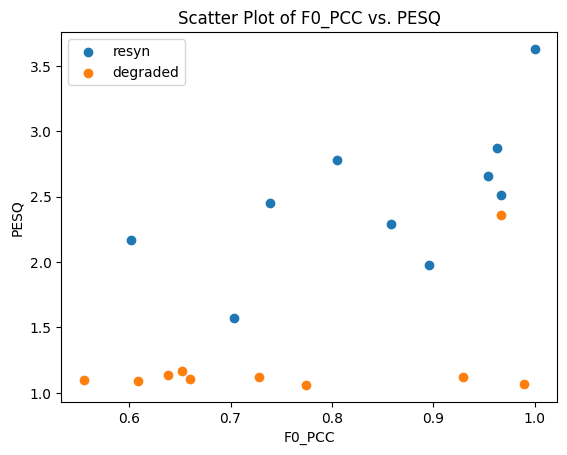

In [19]:
#Choose two evaluation metircs: MCD, F0_PCC, PESQ, ViSQOL, MOSNet_MOS
metrics = ['F0_PCC','PESQ']

# select columns
x_1 = df_resyn[metrics[0]]
y_1 = df_resyn[metrics[1]]
x_2 = df_degraded[metrics[0]]
y_2 = df_degraded[metrics[1]]

# create scatter plot
plt_1 = plt.scatter(x_1, y_1)
plt_2 = plt.scatter(x_2,y_2)

# add title and axis labels
plt.title(f'Scatter Plot of {metrics[0]} vs. {metrics[1]}')
plt.xlabel(metrics[0])
plt.ylabel(metrics[1])
plt.legend([plt_1, plt_2], ["resyn", "degraded"])

# show plot
plt.show()

## Correlation test

Correlation matrix shows the correlation coefficients between each pair of metrics. The correlation coefficient ranges from -1 to 1, where values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate little to no correlation.



In [20]:
# DataFrame with the evaluation results
evaluation_results = df_resyn.iloc[:, 2:]

# Calculate the correlation matrix
correlation_matrix = evaluation_results.corr()

# Print the correlation matrix
print(correlation_matrix)


             MCD    F0_PCC      PESQ    MOSNet     NISQA
MCD     1.000000 -0.698116 -0.502489 -0.446088  0.406389
F0_PCC -0.698116  1.000000  0.620249  0.229624 -0.315103
PESQ   -0.502489  0.620249  1.000000  0.268551  0.223800
MOSNet -0.446088  0.229624  0.268551  1.000000 -0.384059
NISQA   0.406389 -0.315103  0.223800 -0.384059  1.000000


In [21]:
df_resyn_long = df_resyn[df_resyn['audio_file_name'].str.contains('long')].iloc[:, 2:]
df_resyn_short = df_resyn[df_resyn['audio_file_name'].str.contains('short')].iloc[:, 2:]
df_degraded_long = df_degraded[df_degraded['audio_file_name'].str.contains('long')].iloc[:, 2:]
df_degraded_short = df_degraded[df_degraded['audio_file_name'].str.contains('short')].iloc[:, 2:]

df_long = df_resyn_long.append(df_degraded_long, ignore_index=True)
df_short = df_resyn_short.append(df_degraded_short, ignore_index=True)

# Calculate the correlation matrix
correlation_matrix_long = df_long.corr()
correlation_matrix_short = df_short.corr()

# Print the correlation matrix
print("-----------------long-----------------")
print(correlation_matrix_long)
print("----------------short-----------------")
print(correlation_matrix_short)

-----------------long-----------------
             MCD    F0_PCC      PESQ    MOSNet     NISQA
MCD     1.000000 -0.726483 -0.714824  0.547617 -0.254027
F0_PCC -0.726483  1.000000  0.613035 -0.723515 -0.009527
PESQ   -0.714824  0.613035  1.000000 -0.487097  0.516956
MOSNet  0.547617 -0.723515 -0.487097  1.000000  0.122100
NISQA  -0.254027 -0.009527  0.516956  0.122100  1.000000
----------------short-----------------
             MCD    F0_PCC      PESQ    MOSNet     NISQA
MCD     1.000000 -0.476935 -0.543135 -0.142831 -0.746347
F0_PCC -0.476935  1.000000  0.582379 -0.217569  0.634264
PESQ   -0.543135  0.582379  1.000000 -0.535148  0.173991
MOSNet -0.142831 -0.217569 -0.535148  1.000000  0.472352
NISQA  -0.746347  0.634264  0.173991  0.472352  1.000000


<ipython-input-21-d569f6e2ef0d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_long = df_resyn_long.append(df_degraded_long, ignore_index=True)
<ipython-input-21-d569f6e2ef0d>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_short = df_resyn_short.append(df_degraded_short, ignore_index=True)


## long-short analysis

<Axes: title={'center': 'Degraded audios'}, ylabel='Mean Values'>

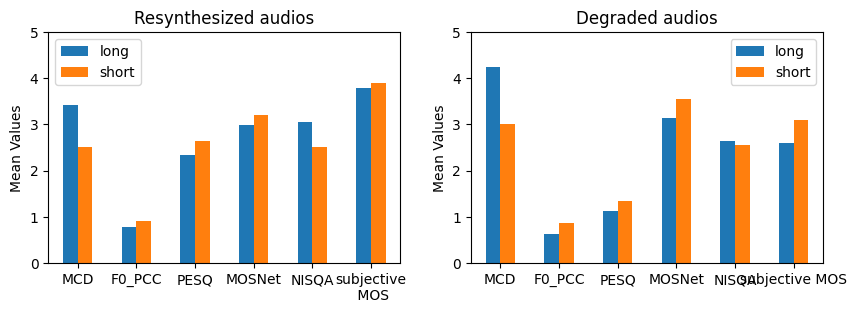

In [29]:
df_resyn_long_mean = df_resyn[df_resyn['audio_file_name'].str.contains('long')].iloc[:, 2:].mean()
df_resyn_short_mean = df_resyn[df_resyn['audio_file_name'].str.contains('short')].iloc[:, 2:].mean()
df_resyn_long_mean['subjective\n MOS'] =  3.800 # to be replaced by subjective eval result
df_resyn_short_mean['subjective\n MOS'] = 3.900 # to be replaced by subjective eval result

df_degraded_long_mean = df_degraded[df_degraded['audio_file_name'].str.contains('long')].iloc[:, 2:].mean()
df_degraded_short_mean = df_degraded[df_degraded['audio_file_name'].str.contains('short')].iloc[:, 2:].mean()
df_degraded_long_mean['subjective MOS'] = 2.600 # to be replaced 
df_degraded_short_mean['subjective MOS'] = 3.100 # to be replaced

# Set the width of each bar
bar_width = 0.35
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# create the dataframe
df_resyn_mean = pd.DataFrame({'long': df_resyn_long_mean.values, 'short': df_resyn_short_mean.values}, index=df_resyn_long_mean.index)
df_degraded_mean = pd.DataFrame({'long': df_degraded_long_mean.values, 'short': df_degraded_short_mean.values}, index=df_degraded_long_mean.index)

# plot
df_resyn_mean.plot(kind='bar', rot=0, title='Resynthesized audios', ylabel='Mean Values',ylim=(0,5), ax=ax1)
df_degraded_mean.plot(kind='bar', rot=0, title='Degraded audios', ylabel='Mean Values',ylim=(0,5), ax=ax2)

## female and male

<Axes: title={'center': 'Degraded audios'}, ylabel='Mean Values'>

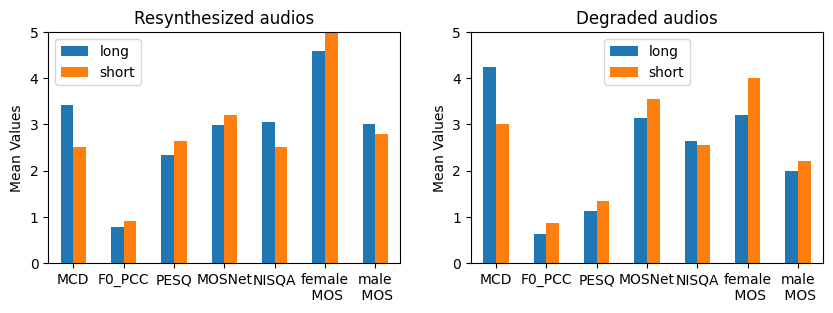

In [30]:
df_resyn_long_mean = df_resyn[df_resyn['audio_file_name'].str.contains('long')].iloc[:, 2:].mean()
df_resyn_short_mean = df_resyn[df_resyn['audio_file_name'].str.contains('short')].iloc[:, 2:].mean()
df_resyn_long_mean['female\n MOS'] = 4.6 # to be replaced by subjective eval result from female
df_resyn_short_mean['female\n MOS'] = 5 # to be replaced by subjective eval result from female
df_resyn_long_mean['male\n MOS'] = 3 # to be replaced by subjective eval result from male
df_resyn_short_mean['male\n MOS'] = 2.8 # to be replaced by subjective eval result from male

df_degraded_long_mean = df_degraded[df_degraded['audio_file_name'].str.contains('long')].iloc[:, 2:].mean()
df_degraded_short_mean = df_degraded[df_degraded['audio_file_name'].str.contains('short')].iloc[:, 2:].mean()
df_degraded_long_mean['female\n MOS'] = 3.2 # to be replaced 
df_degraded_short_mean['female\n MOS'] = 4 # to be replaced
df_degraded_long_mean['male\n MOS'] = 2 # to be replaced by subjective eval result from male
df_degraded_short_mean['male\n MOS'] = 2.2 # to be replaced by subjective eval result from male

# Set the width of each bar
bar_width = 0.35
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

# create the dataframe
df_resyn_mean = pd.DataFrame({'long': df_resyn_long_mean.values, 'short': df_resyn_short_mean.values}, index=df_resyn_long_mean.index)
df_degraded_mean = pd.DataFrame({'long': df_degraded_long_mean.values, 'short': df_degraded_short_mean.values}, index=df_degraded_long_mean.index)

# plot
df_resyn_mean.plot(kind='bar', rot=0, title='Resynthesized audios', ylabel='Mean Values',ylim=(0,5), ax=ax1)
df_degraded_mean.plot(kind='bar', rot=0, title='Degraded audios', ylabel='Mean Values',ylim=(0,5), ax=ax2)